<a href="https://colab.research.google.com/github/kylebell8/Estimating-Heart-Failure-SVM/blob/main/CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/
%ls
%cd My\ Drive
%ls

Mounted at /content/drive
/content/drive
MyDrive/
/content/drive/My Drive
'Colab Notebooks'/  'NN classifier'/    Untitled1.ipynb
 data/              'SVM classifier'/   Untitled2.ipynb
'ML revision'/       Untitled0.ipynb    Untitled3.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('data/heart_failure_clinical_records_dataset_edited.csv')

dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,60.836032,0.436893,589.504854,0.420712,37.970874,0.359223,264609.737152,1.417379,136.621359,0.320388,127.385113,0.343042
std,11.809900,0.496806,976.054201,0.494474,11.885648,0.480551,98052.779410,1.080014,4.413196,0.467383,77.953349,0.475495
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,118.000000,0.000000,30.000000,0.000000,213000.000000,0.900000,134.000000,0.000000,65.000000,0.000000
50%,60.000000,0.000000,253.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,0.000000,111.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,305000.000000,1.400000,140.000000,1.000000,200.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,285.000000,1.000000


In [ ]:
dataset.shape

(309, 13)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       309 non-null    float64
 1   anaemia                   309 non-null    int64  
 2   creatinine_phosphokinase  309 non-null    int64  
 3   diabetes                  309 non-null    int64  
 4   ejection_fraction         309 non-null    int64  
 5   high_blood_pressure       309 non-null    int64  
 6   platelets                 309 non-null    float64
 7   serum_creatinine          309 non-null    float64
 8   serum_sodium              309 non-null    int64  
 9   sex                       309 non-null    object 
 10  smoking                   309 non-null    int64  
 11  time                      309 non-null    int64  
 12  DEATH_EVENT               309 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 31.5+ KB


In [ ]:
dataset.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [ ]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,8,1


In [ ]:
duplicate_rows_df = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (10, 13)


In [ ]:
#dropping the duplicates
dataset = dataset.drop_duplicates()
#counting the number of rows after removing duplicates
dataset.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

In [ ]:
duplicate_rows_df = dataset[dataset.duplicated()]
print("New number of duplicate rows: ", duplicate_rows_df.shape)

New number of duplicate rows:  (0, 13)


In [ ]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
dataset['sex'].replace('M', 1, inplace=True)
dataset['sex'].replace('F', 0, inplace=True)
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [ ]:
dataset.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

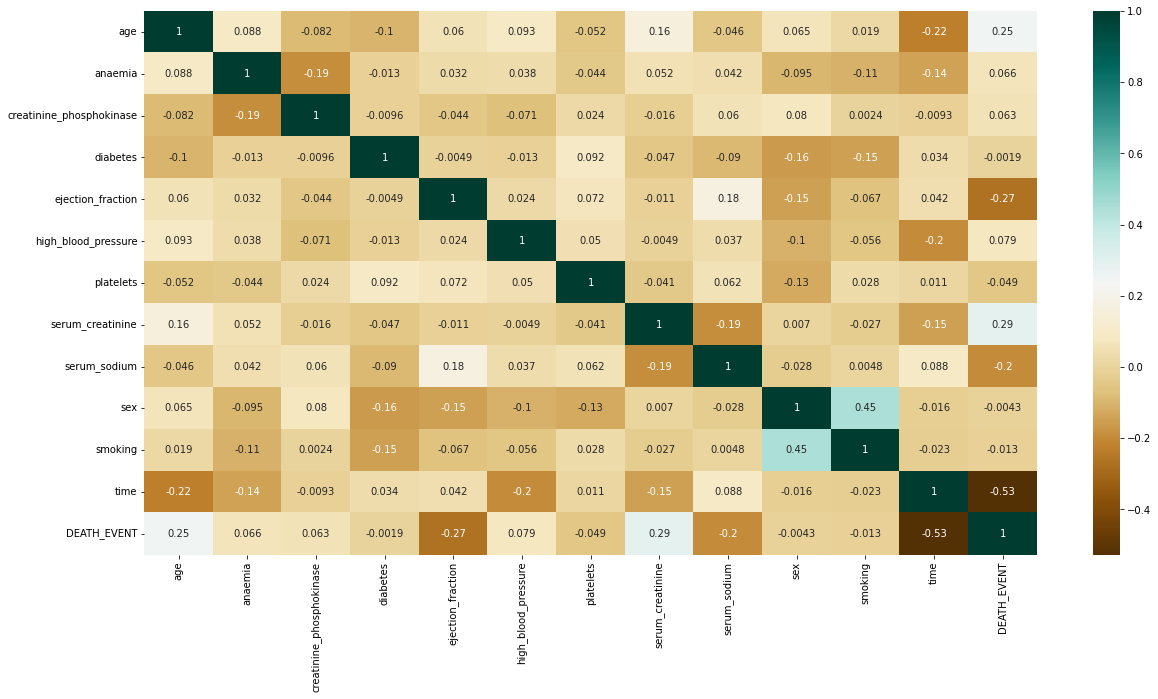

In [ ]:
plt.figure(figsize=(20,10))
corl=dataset.corr()
sns.heatmap(corl, cmap="BrBG", annot=True)
print(corl)

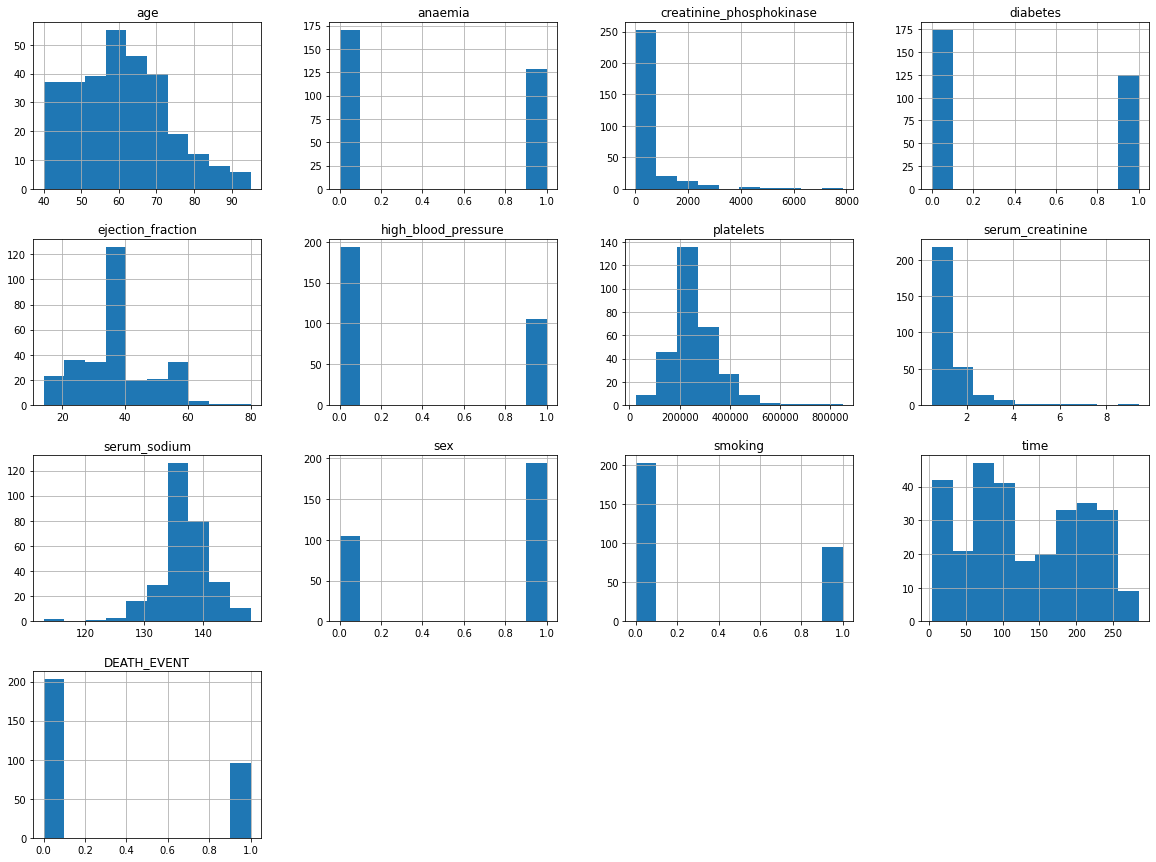

In [ ]:
dataset.hist(figsize=(20,15));

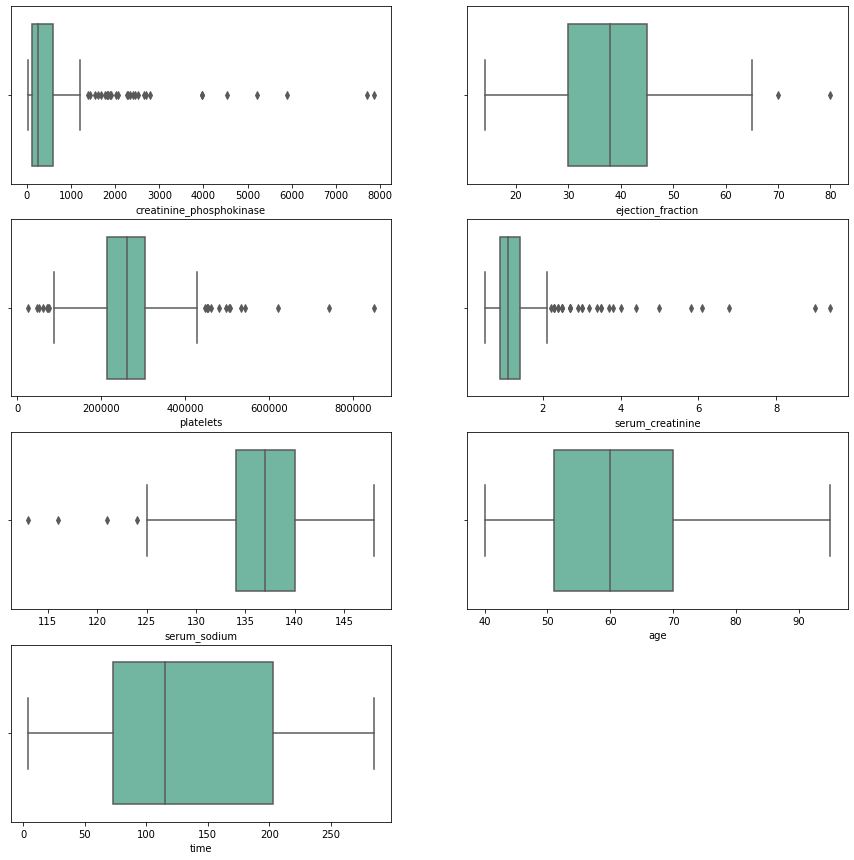

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','age','time']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = dataset ,palette='Set2')
plt.show()

In [ ]:
(dataset['DEATH_EVENT'] == 0).sum()

203

In [ ]:
(dataset['DEATH_EVENT'] == 1).sum()

96

In [ ]:
#split dataset into input variable x and target variable y
X = dataset.drop(['DEATH_EVENT'], axis=1)
y = dataset.DEATH_EVENT

print(X.head())
print(y[0:5])


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        

In [ ]:
## specify the training, validation and test dataset
#specify the training set: 80% for training
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=1)

print("Size of the training X:",X_train.shape)

#split the rest 30% dataset further into validation data set and test dataset
X_validation, X_test, y_validation, y_test = train_test_split(X_tmp, y_tmp,
                                              test_size=0.5, random_state=1)

print("Size of the validation X:", X_validation.shape)
print("Size of the test :", X_test.shape)


Size of the training X: (179, 12)
Size of the validation X: (60, 12)
Size of the test : (60, 12)


In [ ]:
#Note, this may run slowly on colab and runs quicker in the local machine
scaler = StandardScaler()

kernels = list(['linear', 'rbf'])
c = list([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
gammas = list([0.1, 1, 10, 100])

clf = SVC()
clf.fit(X_train, y_train)
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, scoring='accuracy', cv=10, verbose=10)
scaler = StandardScaler()
grid_X_train = scaler.fit_transform(X_train)
grid.fit(grid_X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 1/10; 1/64] START C=0.001, gamma=0.1, kernel=linear.........................
[CV 1/10; 1/64] END C=0.001, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/10; 1/64] START C=0.001, gamma=0.1, kernel=linear.........................
[CV 2/10; 1/64] END C=0.001, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 3/10; 1/64] START C=0.001, gamma=0.1, kernel=linear.........................
[CV 3/10; 1/64] END C=0.001, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 4/10; 1/64] START C=0.001, gamma=0.1, kernel=linear.........................
[CV 4/10; 1/64] END C=0.001, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 5/10; 1/64] START C=0.001, gamma=0.1, kernel=linear.........................
[CV 5/10; 1/64] END C=0.001, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 6/10; 1/64] START C=0.001, gamma=0.1, kernel=linear.........................
[CV 6/10; 1/64] 

In [ ]:
clf1 = SVC()
clf1 = clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_validation)
print("Accuracy clf1:",metrics.accuracy_score(y_validation, y_pred1))

Accuracy clf1: 0.6833333333333333


In [ ]:
clf2 = SVC(C=10, gamma=0.1, kernel='linear')
clf2 = clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_validation)
print("Accuracy clf2:", metrics.accuracy_score(y_validation, y_pred2))

Accuracy clf2: 0.8


In [ ]:
y_pred3 = clf1.predict(X_test)
print("test accuracy clf1:",metrics.accuracy_score(y_test, y_pred3))

test accuracy clf1: 0.7166666666666667


In [ ]:
y_pred4 = clf2.predict(X_test)
print(" test accuracy clf2:",metrics.accuracy_score(y_test, y_pred4))

 test accuracy clf2: 0.8166666666666667
